<a href="https://colab.research.google.com/github/Natruja-W/229352-StatisticalLearning/blob/main/Lab06_SVM_660510738.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [2]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

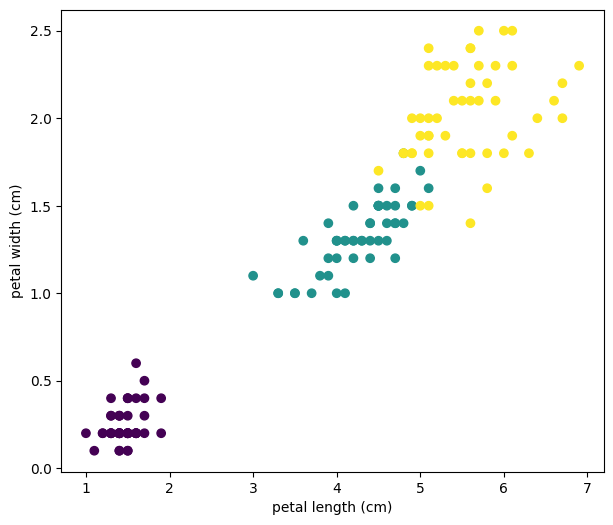

In [3]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [4]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


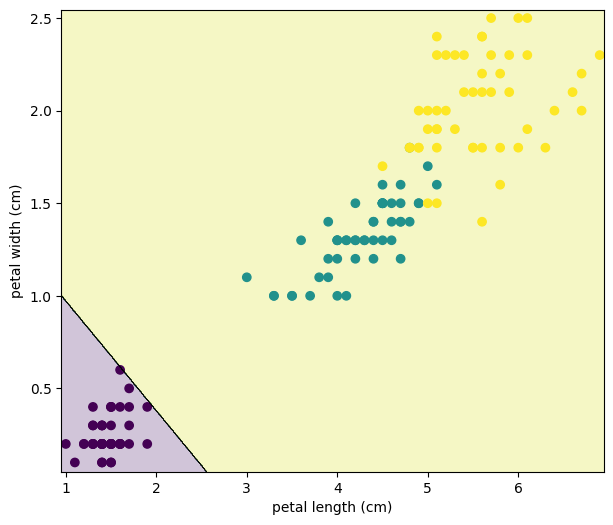

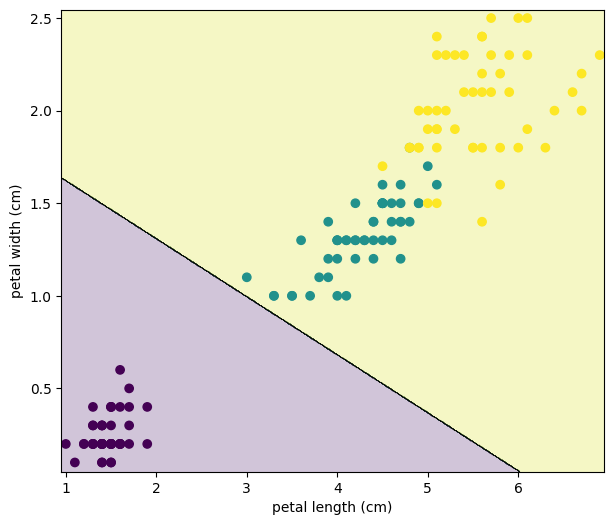

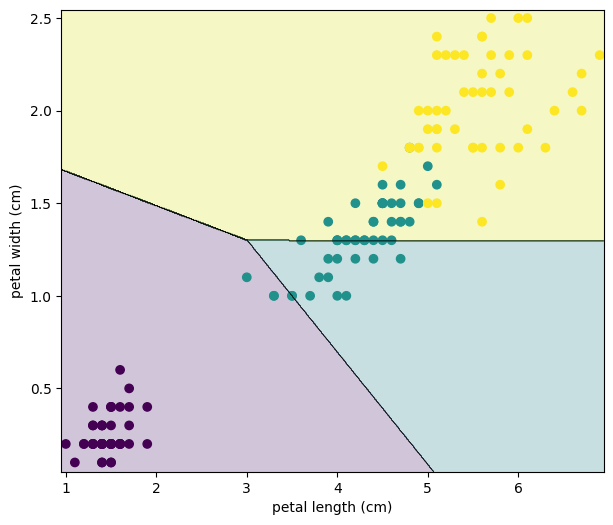

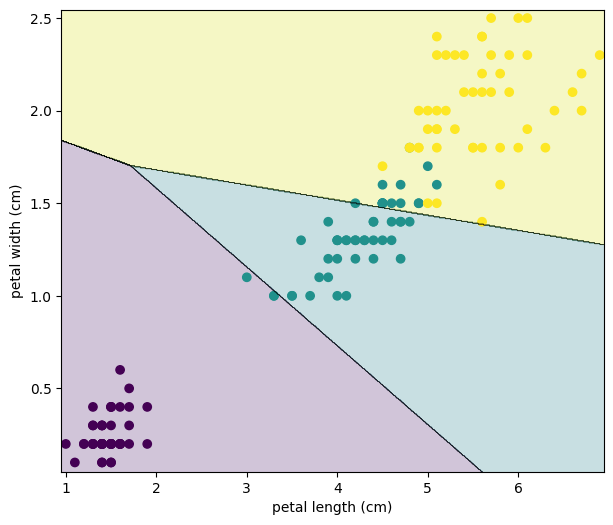

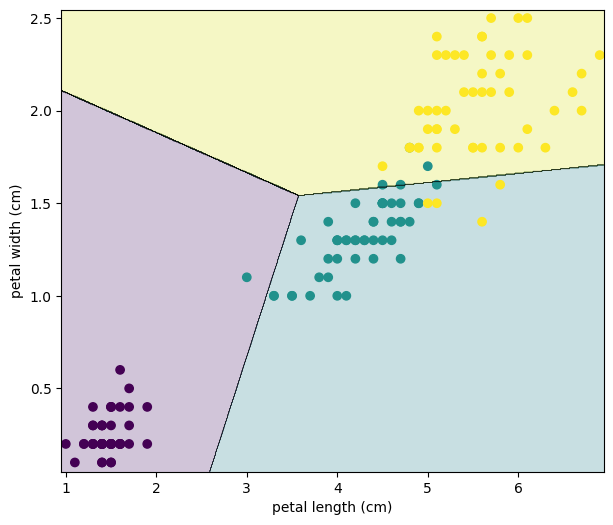

In [8]:
Cs = [0.01, 0.1, 1.0, 10.0, 100.0]
for C in Cs:
    clf_linear = LinearSVC(loss='hinge', C=C, max_iter=100000, random_state=42)
    clf_linear.fit(X_train, y_train)
    plot_decision_boundary(clf_linear, X, y)

**What is the effect of C on the decision boundary?**

ยิ่งค่าCเยอะ ขอบเขตของmarginจะเล็กลงและจะพอดีกับข้อมูลมากขึ้น ถ้าค่า C น้อยจะยอมให้ล้ำเส้นได้บ้าง(soft margin) เส้น boundry เรียบขึ้น

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
#TODO
best_C = 1.0
clf_best_linear = LinearSVC(loss='hinge', C=best_C, max_iter=100000, random_state=42)
clf_best_linear.fit(X_train, y_train)
y_pred_linear = clf_best_linear.predict(X_test)
test_acc_linear = accuracy_score(y_test, y_pred_linear)
test_error_linear = 1 - test_acc_linear
print(f"Best Linear SVM (C={best_C}): Test Accuracy = {test_acc_linear:.3f}, Test Error = {test_error_linear:.3f}")

Best Linear SVM (C=1.0): Test Accuracy = 0.689, Test Error = 0.311


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

Gamma = 0.01
Gamma = 0.1
Gamma = 1.0
Gamma = 10.0
Gamma = 100.0


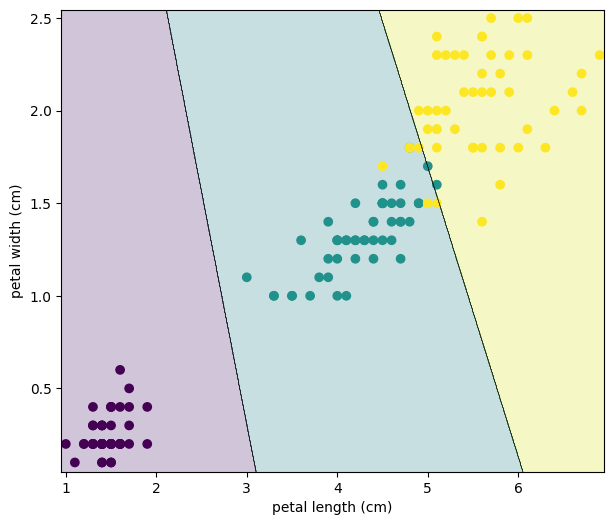

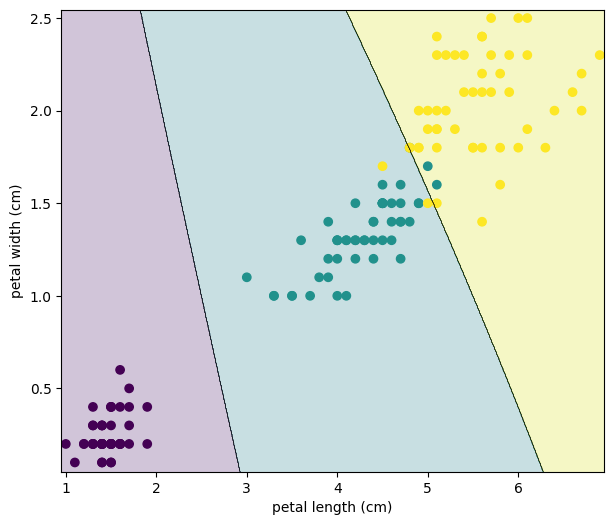

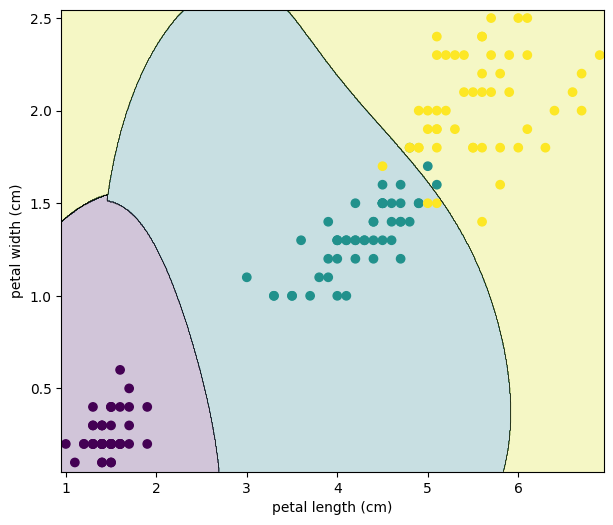

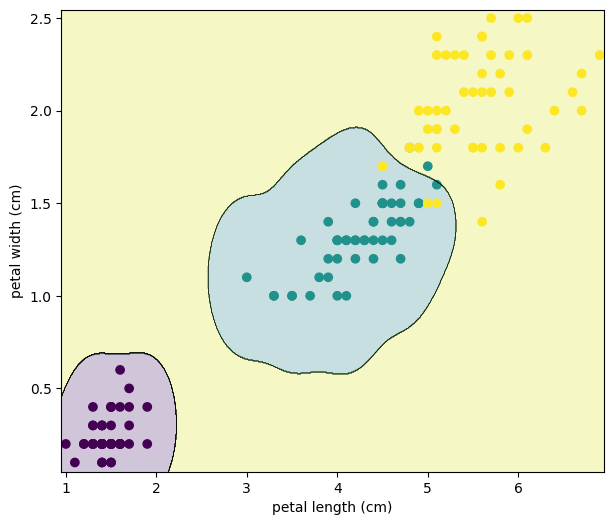

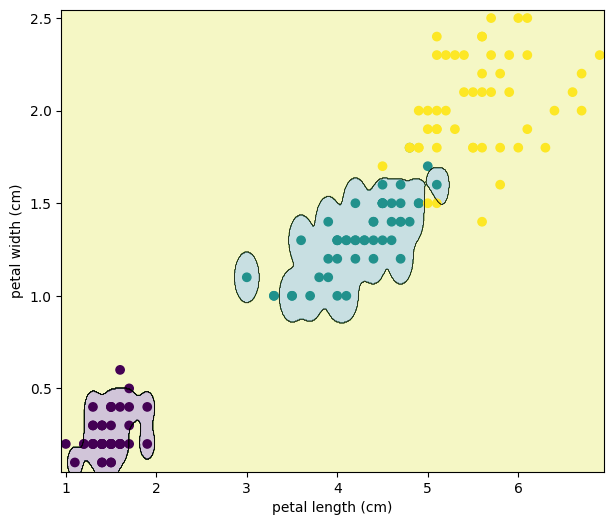

In [15]:
#TODO
gammas = [0.01, 0.1, 1.0, 10.0, 100.0]
for gamma in gammas:
    clf_rbf = SVC(kernel='rbf', C=1.0, gamma=gamma, random_state=42)
    clf_rbf.fit(X_train, y_train)
    plot_decision_boundary(clf_rbf, X, y)
    print(f"Gamma = {gamma}")

**What is the effect of gamma on the decision boundary?**

gamma เล็ก boundary เรียบ (underfit)

gamma ใหญ่ boundary ซับซ้อนมาก (overfit)

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [16]:
#TODO
best_gamma = 0.1
clf_best_rbf = SVC(kernel='rbf', C=1.0, gamma=best_gamma, random_state=42)
clf_best_rbf.fit(X_train, y_train)
y_pred_rbf = clf_best_rbf.predict(X_test)
test_acc_rbf = accuracy_score(y_test, y_pred_rbf)
test_error_rbf = 1 - test_acc_rbf
n_support = clf_best_rbf.n_support_.sum()

print(f"Best RBF SVM (gamma={best_gamma}): Test Accuracy = {test_acc_rbf:.3f}, Test Error = {test_error_rbf:.3f}")
print(f"Number of support vectors = {n_support}")

Best RBF SVM (gamma=0.1): Test Accuracy = 0.956, Test Error = 0.044
Number of support vectors = 37


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [19]:
#TODO
if test_acc_rbf > test_acc_linear:
    preferred_model = "RBF Kernel SVM"
else:
    preferred_model = "Linear SVM"

print(preferred_model)

RBF Kernel SVM


**Explain using test accuracy**

Kernel SVM มี test accuracy สูงกว่า และ decision boundary แบ่งคลาสได้เหมาะสมกว่า

**Explaing using decision boundary plot**

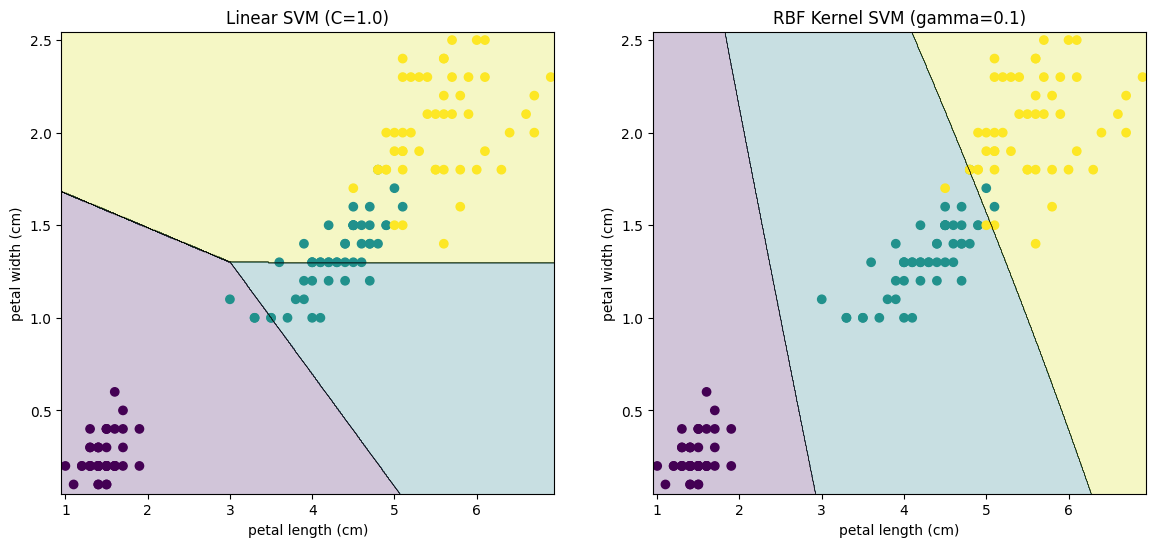

In [20]:
clf_linear_best = LinearSVC(loss='hinge', C=1.0, max_iter=100000, random_state=42)
clf_linear_best.fit(X_train, y_train)

clf_rbf_best = SVC(kernel='rbf', C=1.0, gamma=0.1, random_state=42)
clf_rbf_best.fit(X_train, y_train)

h = 0.005
x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z_linear = clf_linear_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

Z_rbf = clf_rbf_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

fig, axes = plt.subplots(1, 2, figsize=(14,6))

axes[0].contourf(xx, yy, Z_linear, alpha=0.25)
axes[0].contour(xx, yy, Z_linear, colors='k', linewidths=0.2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_title("Linear SVM (C=1.0)")
axes[0].set_xlabel(iris.feature_names[2])
axes[0].set_ylabel(iris.feature_names[3])

axes[1].contourf(xx, yy, Z_rbf, alpha=0.25)
axes[1].contour(xx, yy, Z_rbf, colors='k', linewidths=0.2)
axes[1].scatter(X[:,0], X[:,1], c=y)
axes[1].set_title("RBF Kernel SVM (gamma=0.1)")
axes[1].set_xlabel(iris.feature_names[2])
axes[1].set_ylabel(iris.feature_names[3])

plt.show()
